In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [84]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Data/fullDataSet.csv')
data
#removed all NULLS, removed 60654/60642, removed outlier zips (60601, 60602, 60603, 60604)

,Unnamed: 0,long_date,Zip,total_num_crimes,total_num_noise,month_year,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,...,Pothole_Per_Capita,Num_Rests,Rests_Per_Capita,starbucks_stores,Sbucks_Per_Capita,Public_Prop_Ct,Public_Prop_Per_Capita,Grocery_Store_Count,Grocery_Store_Per_Capita,DOW_Close
0,0,1/1/2017,60605,5,5,201701,419800.0,108,66.5,76,...,0.013040,176,0.014167,4,0.000322,40,0.003220,3,0.000241,19864.09
1,1,1/1/2017,60607,13,13,201701,539050.0,73,61.0,56,...,0.027127,343,0.027610,6,0.000483,92,0.005916,3,0.000193,19864.09
2,2,1/1/2017,60608,18,18,201701,292300.0,66,66.0,36,...,0.087016,427,0.034372,1,0.000080,344,0.003720,14,0.000151,19864.09
3,3,1/1/2017,60609,13,13,201701,169500.0,47,61.0,28,...,0.048137,212,0.017065,1,0.000080,1640,0.020637,5,0.000063,19864.09
4,4,1/1/2017,60610,43,43,201701,650050.0,270,76.0,204,...,0.018675,219,0.017629,13,0.001046,57,0.001200,7,0.000147,19864.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2663,12/1/2019,60647,33,33,201912,525000.0,172,51.5,60,...,0.057152,431,0.034694,4,0.000322,125,0.001266,15,0.000152,28538.44
1694,2667,12/1/2019,60653,3,3,201912,372450.0,105,59.5,20,...,0.013523,82,0.006601,0,0.000000,780,0.022607,2,0.000058,28538.44
1695,2670,12/1/2019,60656,4,4,201912,287050.0,69,62.0,20,...,0.032037,51,0.004105,1,0.000080,3,0.000111,2,0.000074,28538.44
1696,2671,12/1/2019,60657,11,11,201912,486300.0,337,58.0,84,...,0.029542,442,0.035579,7,0.000563,22,0.000329,7,0.000105,28538.44


In [85]:
data = data.dropna(how='any')

In [86]:
# Assign the data to X and y

X = data[[ "total_num_crimes", "Income", "Bus_Stop_Per_Capita","311_Per_Capita", "311_Per_Capita", "total_num_noise","School_rating", "L_Stop_Per_Capita"]]
y = data['median_listing_price_per_square_foot'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1698, 8) (1698, 1)


In [87]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [88]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [89]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7198608578666978
Testing Score: 0.6820419059892623


Text(0.5, 1.0, 'Residual Plot')

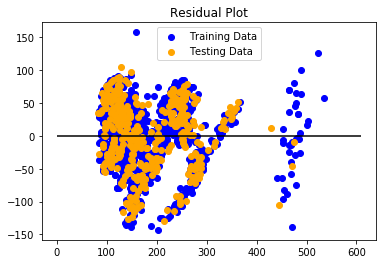

In [90]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [91]:
model.predict(X)

array([[270.42515896],
       [276.44100891],
       [149.77830589],
       ...,
       [231.29756713],
       [249.44803771],
       [154.95615654]])

In [81]:
model.predict(X[0:1])


array([[270.42419356]])

In [67]:
print(X[0:1])

   total_num_crimes  Income  Bus_Stop_Per_Capita  311_Per_Capita  \
0                 5   56151             0.007406            0.19   

   311_Per_Capita  total_num_noise  School_rating  L_Stop_Per_Capita  
0            0.19                0            8.5           0.000805  
